In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import skimpy
import string
import re
from skimpy import clean_columns
import descartes
import geopandas as gpd
from geopandas import io
from shapely.geometry import Point, Polygon
import fiona
from chicago import COMMUNITY_AREAS, NEIGHBORHOODS
import json
import geodatasets
import folium
import mapclassify

In [150]:
data = pd.read_csv('data_cleaned.csv')
data.head()

C:\Users\cathy\AppData\Local\Temp\ipykernel_10956\1908207649.py:1: DtypeWarning: Columns (14,28,37,38) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data_cleaned.csv')


,Unnamed: 0,index_row,id,program_name,description,org_name,category_name,capacity,min_age,max_age,...,wed_end_time,wed_start_time,program_price,geographic_cluster_name,program_pays_participants,program_has_scholarships,program_provides_transportation,latitude,longitude,program_provides_free_food
0,0,"4,568",78752,BBBS Community Based Mentoring (Year Round),Community Based Mentoring is the traditional B...,Big Brothers Big Sisters,academic_support,2000.0,7,15,...,NaN,NaN,Free,NEAR WEST SIDE,Not Paid,YES,YES,41.886002,-87.642403,False
1,1,"4,569",78752,BBBS Community Based Mentoring (Year Round),Community Based Mentoring is the traditional B...,Big Brothers Big Sisters,work_career,2000.0,7,15,...,NaN,NaN,Free,NEAR WEST SIDE,Not Paid,YES,YES,41.886002,-87.642403,False
2,2,"4,562",78749,Youth Mentoring and Academic Supports,Young Men's Educational Network provides mento...,Youth Mentoring and Academic Supports,academic_support,100.0,12,18,...,NaN,NaN,Free,NORTH LAWNDALE,Not Paid,NO,NO,41.864799,-87.724800,True
3,3,"4,563",78749,Youth Mentoring and Academic Supports,Young Men's Educational Network provides mento...,Youth Mentoring and Academic Supports,music_art,100.0,12,18,...,NaN,NaN,Free,NORTH LAWNDALE,Not Paid,NO,NO,41.864799,-87.724800,True
4,4,"4,557",78746,Refugee Youth Career Pathways,Refugee Youth Career Pathways (RYCP) provides ...,RefugeeOne,managing_money,15.0,16,24,...,NaN,NaN,Free,NaN,Not Paid,YES,YES,NaN,NaN,False


In [158]:
chicago = gpd.read_file(geodatasets.get_path("geoda.chicago_commpop"))

In [159]:
chicago['community'] = chicago['community'].apply(str.lower)

In [160]:
gdf = gpd.GeoDataFrame(
    data, geometry=gpd.points_from_xy(data.longitude, data.latitude), crs="EPSG:4326"
)

In [163]:
chicago_df = gpd.GeoDataFrame(pd.concat([chicago, gdf], ignore_index=True))

In [165]:
import os
os.getcwd()
os.chdir("C:\\Users\cathy\OneDrive\Documents\STAT-390-Project\MCMF")

In [156]:
os.environ['SHAPE_RESTORE_SHX'] = 'YES'
street_map = gpd.read_file('Chicago_Community_areas.shp')

<Axes: >

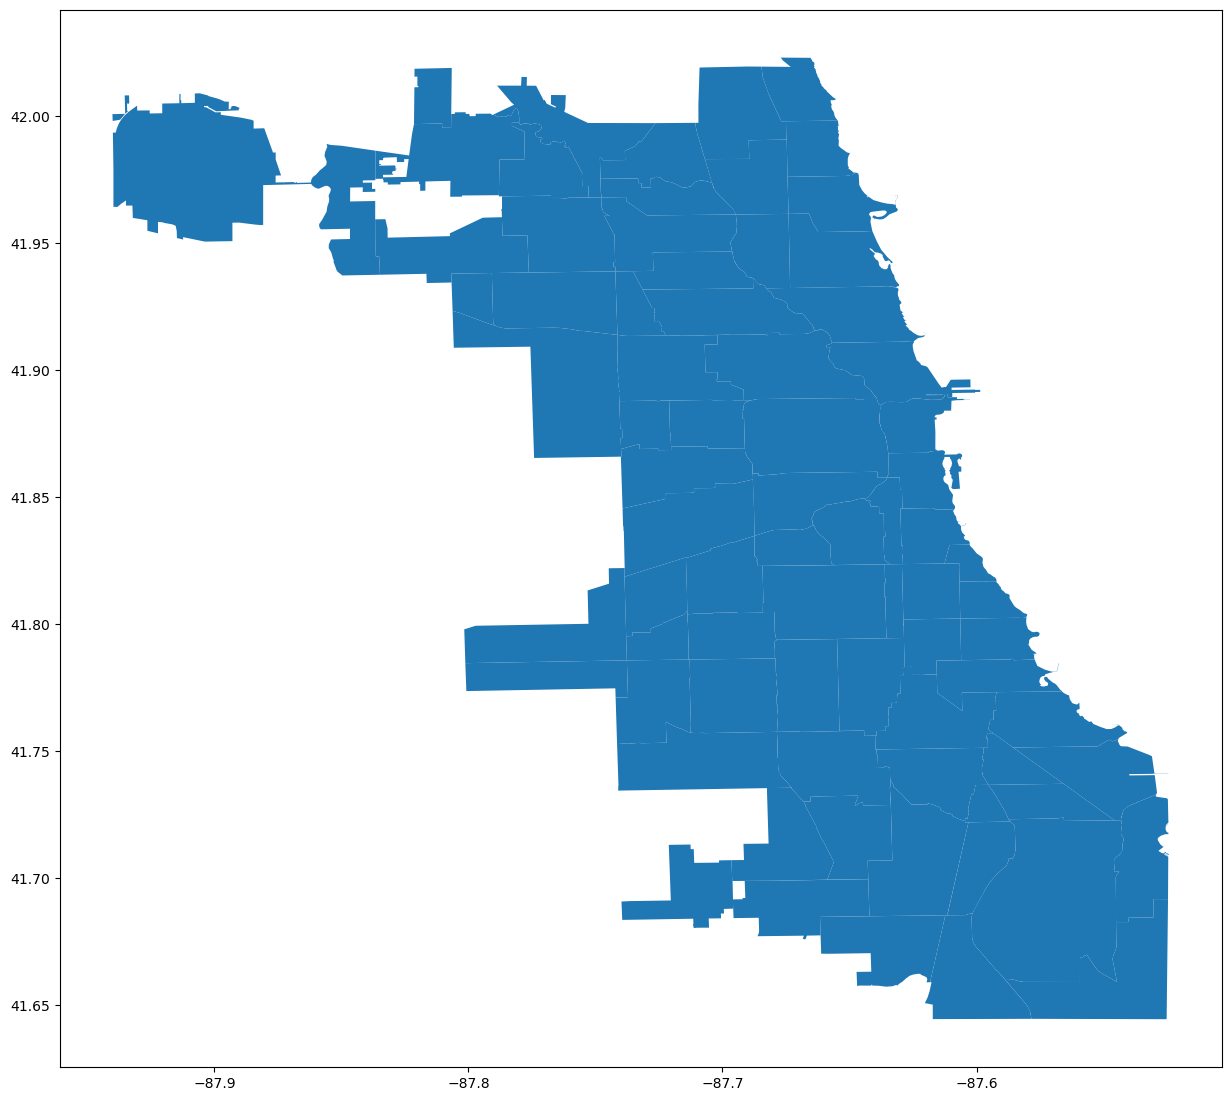

In [157]:
fig, ax = plt.subplots(figsize = (15,15))
street_map.plot(ax=ax)

In [79]:
for n in NEIGHBORHOODS:
    print(n)

Albany Park
Andersonville
Archer Heights
Armour Square
Ashburn
Auburn Gresham
Austin
Avalon Park
Avondale
Belmont Cragin
Beverly
Boystown
Bridgeport
Brighton Park
Bucktown
Burnside
Calumet Heights
Chatham
Chicago Lawn
Chinatown
Clearing
Douglas
Dunning
East Side
East Village
Edgewater
Edison Park
Englewood
Fuller Park
Gage Park
Galewood
Garfield Park
Garfield Ridge
Gold Coast
Grand Boulevard
Grand Crossing
Grant Park
Greektown
Hegewisch
Hermosa
Humboldt Park
Hyde Park
Irving Park
Jackson Park
Jefferson Park
Kenwood
Lake View
Lincoln Park
Lincoln Square
Little Italy, UIC
Little Village
Logan Square
Loop
Lower West Side
Magnificent Mile
Mckinley Park
Millenium Park
Montclare
Morgan Park
Mount Greenwood
Museum Campus
Near South Side
New City
North Center
North Lawndale
North Park
Norwood Park
O'Hare
Oakland
Old Town
Portage Park
Printers Row
Pullman
River North
Riverdale
Rogers Park
Roseland
Rush & Division
Sauganash,Forest Glen
Sheffield & DePaul
South Chicago
South Deering
South Shore
S

In [91]:
m = chicago.explore(
    column="POP2010",  # make choropleth based on "POP2010" column
    scheme="naturalbreaks",  # use mapclassify's natural breaks scheme
    legend=True,  # show legend
    k=10,  # use 10 bins
    tooltip=False,  # hide tooltip
    popup=["POP2010", "POP2000"],  # show popup (on-click)
    legend_kwds=dict(colorbar=False),  # do not use colorbar
    name="chicago",  # name of the layer in the map
)

C:\Users\cathy\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [104]:
geo_df['capacity_cast'] = geo_df['capacity'].astype(str)

In [122]:
chicago_df

,community,NID,POP2010,POP2000,POPCH,POPPERCH,popplus,popneg,geometry,Unnamed: 0,...,program_price,geographic_cluster_name,program_pays_participants,program_has_scholarships,program_provides_transportation,latitude,longitude,program_provides_free_food,binned,capacity_cast
0,DOUGLAS,35.0,18238.0,26470.0,-8232.0,-31.099358,0.0,1.0,"MULTIPOLYGON (((-87.60914 41.84469, -87.60915 ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,OAKLAND,36.0,5918.0,6110.0,-192.0,-3.142390,0.0,1.0,"MULTIPOLYGON (((-87.59215 41.81693, -87.59231 ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,FULLER PARK,37.0,2876.0,3420.0,-544.0,-15.906433,0.0,1.0,"MULTIPOLYGON (((-87.62880 41.80189, -87.62879 ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,GRAND BOULEVARD,38.0,21929.0,28006.0,-6077.0,-21.698922,0.0,1.0,"MULTIPOLYGON (((-87.60671 41.81681, -87.60670 ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,KENWOOD,39.0,17841.0,18363.0,-522.0,-2.842673,0.0,1.0,"MULTIPOLYGON (((-87.59215 41.81693, -87.59215 ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-87.67152 41.87142),84873.0,...,Free,NEAR WEST SIDE,Unknown_Code,NO,NaN,41.871422,-87.671524,NaN,NaN,nan
72863,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-87.73815 41.92909),84874.0,...,Free,HERMOSA,Not Paid,NO,NO,41.929092,-87.738152,False,NaN,nan
72864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-87.73815 41.92909),84875.0,...,Free,HERMOSA,Not Paid,NO,NO,41.929092,-87.738152,False,NaN,nan
72865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-87.73815 41.92909),84876.0,...,Free,HERMOSA,Not Paid,NO,NO,41.929092,-87.738152,False,NaN,nan


<Axes: >

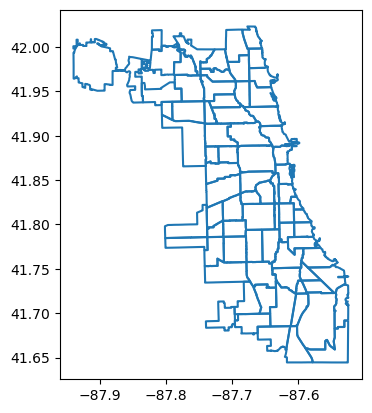

In [125]:
chicago_df.boundary.plot()

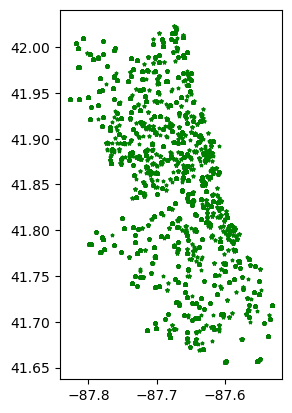

In [128]:
gdf.plot(marker = '*', color = 'green', markersize = 5);
gdf2 = gdf.to_crs(chicago.crs)

<Axes: >

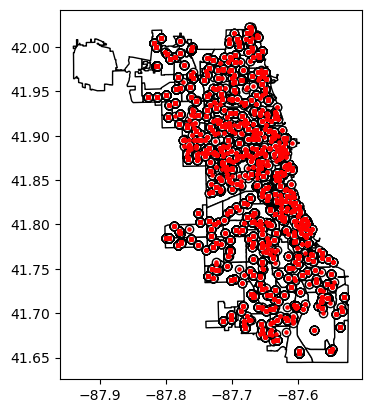

In [130]:
base = chicago_df.plot(color = 'white', edgecolor = 'black')
gdf.plot(ax = base, color = 'red', markersize = 5)

In [92]:
m

In [133]:
gdf['cap'] = gdf['capacity'].astype(str)

In [139]:
chicago_str = chicago_df.astype("str")

In [142]:
chicago_gdf = gpd.GeoDataFrame(
    chicago_str, geometry=gpd.points_from_xy(chicago_str.longitude, chicago_str.latitude), crs="EPSG:4326"
)

In [143]:
c = chicago_gdf.explore(
    column="capacity",  # make choropleth based on "POP2010" column
    scheme="naturalbreaks",  # use mapclassify's natural breaks scheme
    legend=True,  # show legend
    k=10,  # use 10 bins
    tooltip=False,  # hide tooltip
    popup=["POP2010", "POP2000"],  # show popup (on-click)
    legend_kwds=dict(colorbar=False),  # do not use colorbar
    name="chicago",  # name of the layer in the map
)

In [144]:
c

TypeError: 'NoneType' object is not subscriptable

In [55]:
crs = {'init': 'epsg:4326'}

In [56]:
geometry = [Point(xy) for xy in zip(data['longitude'], data['latitude'])]

In [93]:
geo_df = gpd.GeoDataFrame(data, crs = crs, geometry = geometry)

C:\Users\cathy\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [94]:
geo_df.head()

,Unnamed: 0,index_row,id,program_name,description,org_name,category_name,capacity,min_age,max_age,...,program_price,geographic_cluster_name,program_pays_participants,program_has_scholarships,program_provides_transportation,latitude,longitude,program_provides_free_food,geometry,binned
0,0,"4,568",78752,BBBS Community Based Mentoring (Year Round),Community Based Mentoring is the traditional B...,Big Brothers Big Sisters,academic_support,2000.0,7,15,...,Free,NEAR WEST SIDE,Not Paid,YES,YES,41.886002,-87.642403,False,POINT (-87.64240 41.88600),NaN
1,1,"4,569",78752,BBBS Community Based Mentoring (Year Round),Community Based Mentoring is the traditional B...,Big Brothers Big Sisters,work_career,2000.0,7,15,...,Free,NEAR WEST SIDE,Not Paid,YES,YES,41.886002,-87.642403,False,POINT (-87.64240 41.88600),NaN
2,2,"4,562",78749,Youth Mentoring and Academic Supports,Young Men's Educational Network provides mento...,Youth Mentoring and Academic Supports,academic_support,100.0,12,18,...,Free,NORTH LAWNDALE,Not Paid,NO,NO,41.864799,-87.724800,True,POINT (-87.72480 41.86480),"(50.0, 100.0]"
3,3,"4,563",78749,Youth Mentoring and Academic Supports,Young Men's Educational Network provides mento...,Youth Mentoring and Academic Supports,music_art,100.0,12,18,...,Free,NORTH LAWNDALE,Not Paid,NO,NO,41.864799,-87.724800,True,POINT (-87.72480 41.86480),"(50.0, 100.0]"
4,4,"4,557",78746,Refugee Youth Career Pathways,Refugee Youth Career Pathways (RYCP) provides ...,RefugeeOne,managing_money,15.0,16,24,...,Free,NaN,Not Paid,YES,YES,NaN,NaN,False,POINT EMPTY,"(10.0, 25.0]"


<Axes: >

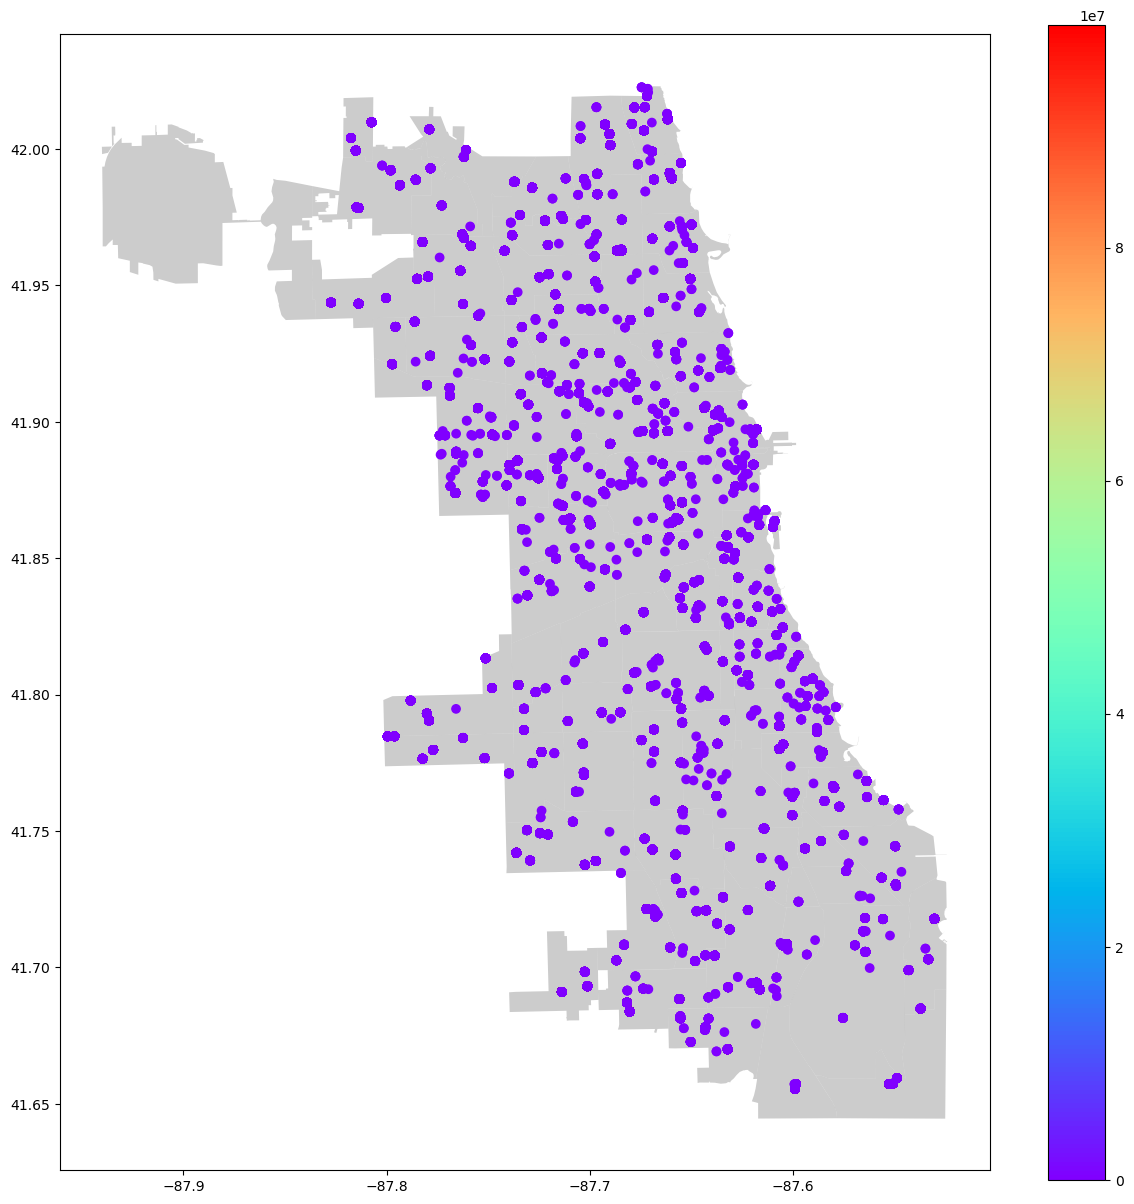

In [59]:
fig, ax = plt.subplots(figsize=(15,15))
street_map.plot(ax=ax, alpha=0.4, color='grey')
geo_df.plot(column = 'capacity', ax=ax, 
            cmap = 'rainbow', legend = True,
                                       marker='o', 
                                       label='Neg')
# geo_df[geo_df['WnvPresent'] == 1].plot(ax=ax, 
#                                        markersize=20, 
#                                        color='red', 
#                                        marker='^', 
#                                        label='Pos')
# plt.legend(prop={'size':15})

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


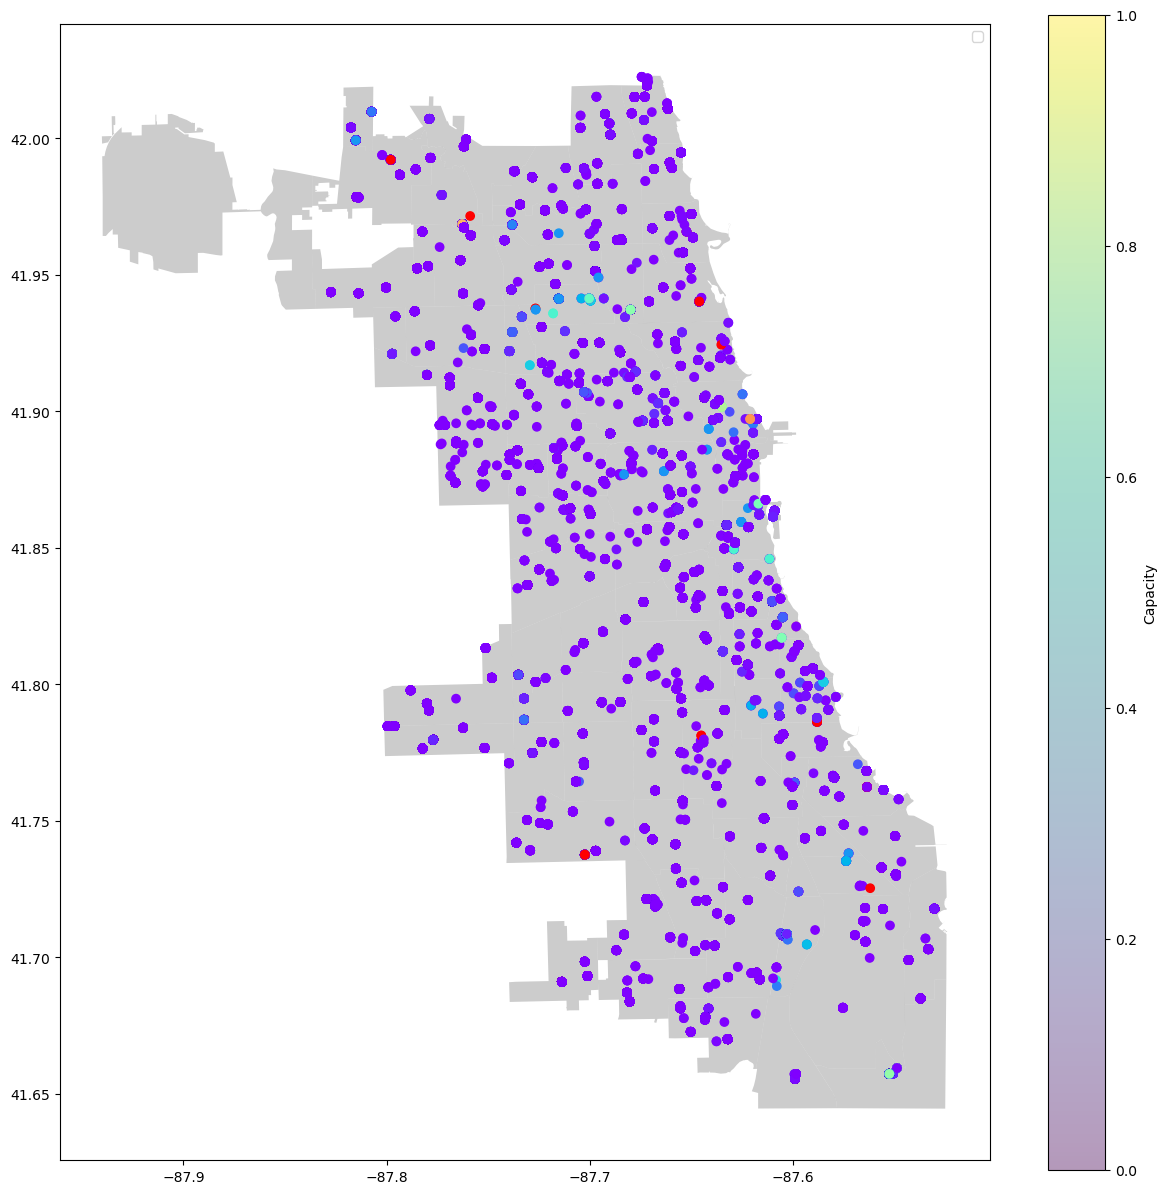

In [61]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Create the base map
fig, ax = plt.subplots(figsize=(15, 15))

# Plot the street map
street_map.plot(ax=ax, alpha=0.4, color='grey')

# Group the data by geographic region
grouped = geo_df.groupby('geographic_cluster_name')

# Define the colormap
cmap = 'rainbow'

# Iterate over the groups and plot each group separately
for region, group in grouped:
    group.plot(column='capacity', ax=ax, cmap=cmap)

# Add colorbar and legend
cbar = plt.colorbar(ax.collections[0])
cbar.set_label('Capacity')
ax.legend()

# Display the plot
plt.show()


In [45]:
geo_df.columns

Index(['Unnamed: 0', 'index_row', 'id', 'program_name', 'description',
       'org_name', 'category_name', 'capacity', 'min_age', 'max_age',
       'meeting_type', 'address', 'city', 'state', 'zipcode', 'online_address',
       'program_url', 'registration_url', 'registration_open',
       'registration_deadline', 'start_date', 'end_date', 'start_time',
       'end_time', 'scheduled_mon', 'scheduled_tues', 'scheduled_fri',
       'scheduled_sat', 'scheduled_sun', 'scheduled_thurs', 'scheduled_wed',
       'fri_end_time', 'fri_start_time', 'mon_end_time', 'mon_start_time',
       'sat_end_time', 'sat_start_time', 'sun_end_time', 'sun_start_time',
       'thurs_end_time', 'thurs_start_time', 'tues_end_time',
       'tues_start_time', 'wed_end_time', 'wed_start_time', 'program_price',
       'geographic_cluster_name', 'program_pays_participants',
       'program_has_scholarships', 'program_provides_transportation',
       'latitude', 'longitude', 'program_provides_free_food', 'geometry'],

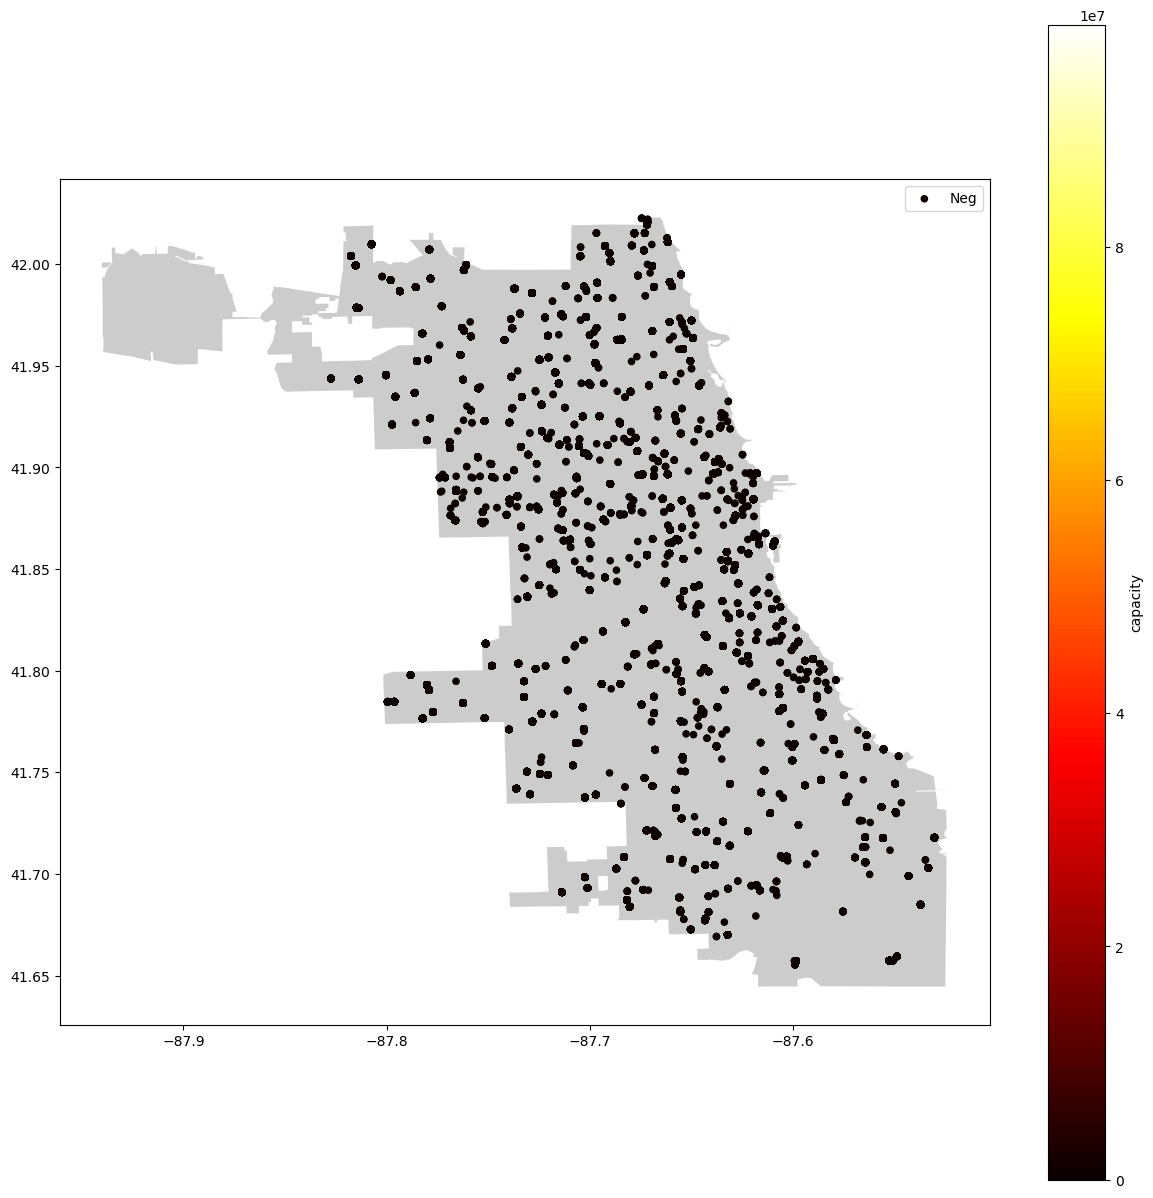

In [47]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Create the base map
fig, ax = plt.subplots(figsize=(15, 15))

# Plot the street map
street_map.plot(ax=ax, alpha=0.4, color='grey')

# Plot the heatmap
heatmap = ax.scatter(geo_df.geometry.x, geo_df.geometry.y, c=geo_df['capacity'], cmap='hot', s=20)

# Add colorbar and legend
cbar = plt.colorbar(heatmap)
cbar.set_label('capacity')
ax.legend(['Neg'])

# Display the plot
plt.show()


In [4]:
focus_clusters = ['AUSTIN', 'NORTH LAWNDALE', 'HUMBOLDT PARK', 'EAST GARFIELD PARK', 
                  'ENGLEWOOD', 'AUBURN GRESHAM', 'WEST GARFIELD PARK', 'ROSELAND', 
                  'GREATER GRAND CROSSING', 'WEST ENGLEWOOD', 'SOUTH SHORE', 'CHICAGO LAWN', 
                  'WEST PULLMAN']

In [5]:
data.columns

Index(['Unnamed: 0', 'index_row', 'id', 'program_name', 'description',
       'org_name', 'category_name', 'capacity', 'min_age', 'max_age',
       'meeting_type', 'address', 'city', 'state', 'zipcode', 'online_address',
       'program_url', 'registration_url', 'registration_open',
       'registration_deadline', 'start_date', 'end_date', 'start_time',
       'end_time', 'scheduled_mon', 'scheduled_tues', 'scheduled_fri',
       'scheduled_sat', 'scheduled_sun', 'scheduled_thurs', 'scheduled_wed',
       'fri_end_time', 'fri_start_time', 'mon_end_time', 'mon_start_time',
       'sat_end_time', 'sat_start_time', 'sun_end_time', 'sun_start_time',
       'thurs_end_time', 'thurs_start_time', 'tues_end_time',
       'tues_start_time', 'wed_end_time', 'wed_start_time', 'program_price',
       'geographic_cluster_name', 'program_pays_participants',
       'program_has_scholarships', 'program_provides_transportation',
       'latitude', 'longitude', 'program_provides_free_food'],
      dtype

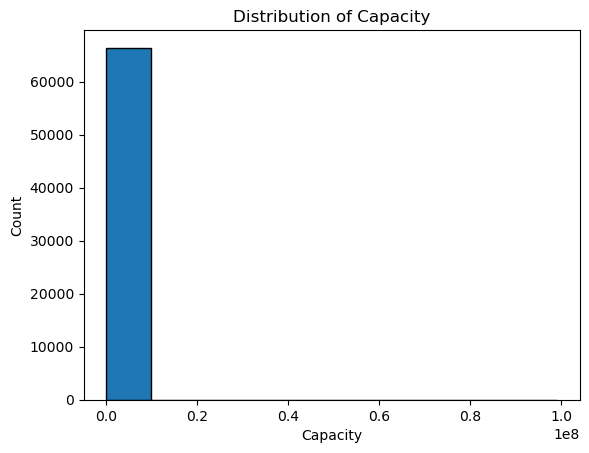

In [6]:
plt.hist(data['capacity'], edgecolor='k')
plt.xlabel('Capacity')
plt.ylabel('Count')
plt.title('Distribution of Capacity')
plt.show()

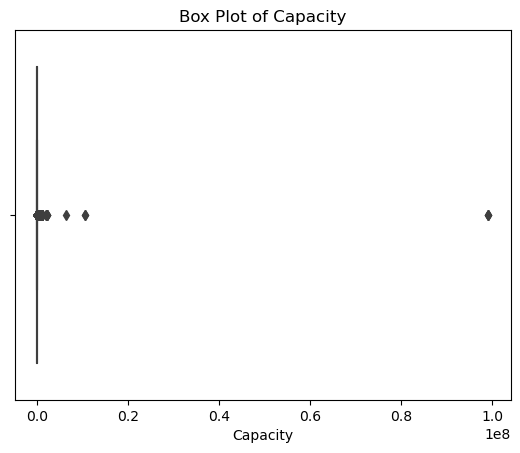

In [7]:
sns.boxplot(x=data['capacity'])
plt.xlabel('Capacity')
plt.title('Box Plot of Capacity')
plt.show()

In [8]:
neighborhood_mean = data.groupby(['geographic_cluster_name']).mean()
neighborhood_mean['capacity'].sort_values

C:\Users\cathy\AppData\Local\Temp\ipykernel_10956\3116147131.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  neighborhood_mean = data.groupby(['geographic_cluster_name']).mean()


<bound method Series.sort_values of geographic_cluster_name
ALBANY PARK        114.488038
ARCHER HEIGHTS      42.170543
ARMOUR SQUARE      148.597855
ASHBURN            242.519507
AUBURN GRESHAM     350.173735
                     ...     
WEST LAWN          161.990842
WEST PULLMAN       222.668085
WEST RIDGE          81.474811
WEST TOWN           31.979462
WOODLAWN          5001.817284
Name: capacity, Length: 79, dtype: float64>